In [26]:
#loaded the data set of the customer service
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')
df.head()


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [27]:
#identified the shape of the data set
df.shape

(364558, 53)

In [28]:
#identified the variable with null values
df.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [29]:
#utilize the missing value treatment
df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [30]:
df.tail(5)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
364553,29609918,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)"
364554,29608392,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)"
364555,29607589,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)"
364556,29610889,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)"
364557,29611816,01/01/2015 12:00:50 AM,01/01/2015 02:47:50 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11420.0,123-19 135 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.674212,-73.803585,"(40.674211762243935, -73.80358548685278)"


In [31]:
df.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

In [34]:
df.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.645580e+05,361560.000000,3.605280e+05,360528.000000,0.0,0.0,0.0,0.0,0.0,360528.000000,360528.000000
mean,3.106595e+07,10858.496659,1.005043e+06,203425.305782,NaN,NaN,NaN,NaN,NaN,40.724980,-73.924946
std,7.331531e+05,578.263114,2.196362e+04,29842.192857,NaN,NaN,NaN,NaN,NaN,0.081907,0.079213
min,2.960737e+07,83.000000,9.133570e+05,121185.000000,NaN,NaN,NaN,NaN,NaN,40.499040,-74.254937
25%,3.049938e+07,10314.000000,9.919460e+05,182945.000000,NaN,NaN,NaN,NaN,NaN,40.668742,-73.972253
50%,3.108795e+07,11209.000000,1.003470e+06,201023.000000,NaN,NaN,NaN,NaN,NaN,40.718406,-73.930643
75%,3.167433e+07,11238.000000,1.019134e+06,222790.000000,NaN,NaN,NaN,NaN,NaN,40.778166,-73.874098
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700715


In [36]:
# perform data exploratory analysis
df.columns= df.columns.str.replace(" ", "_")

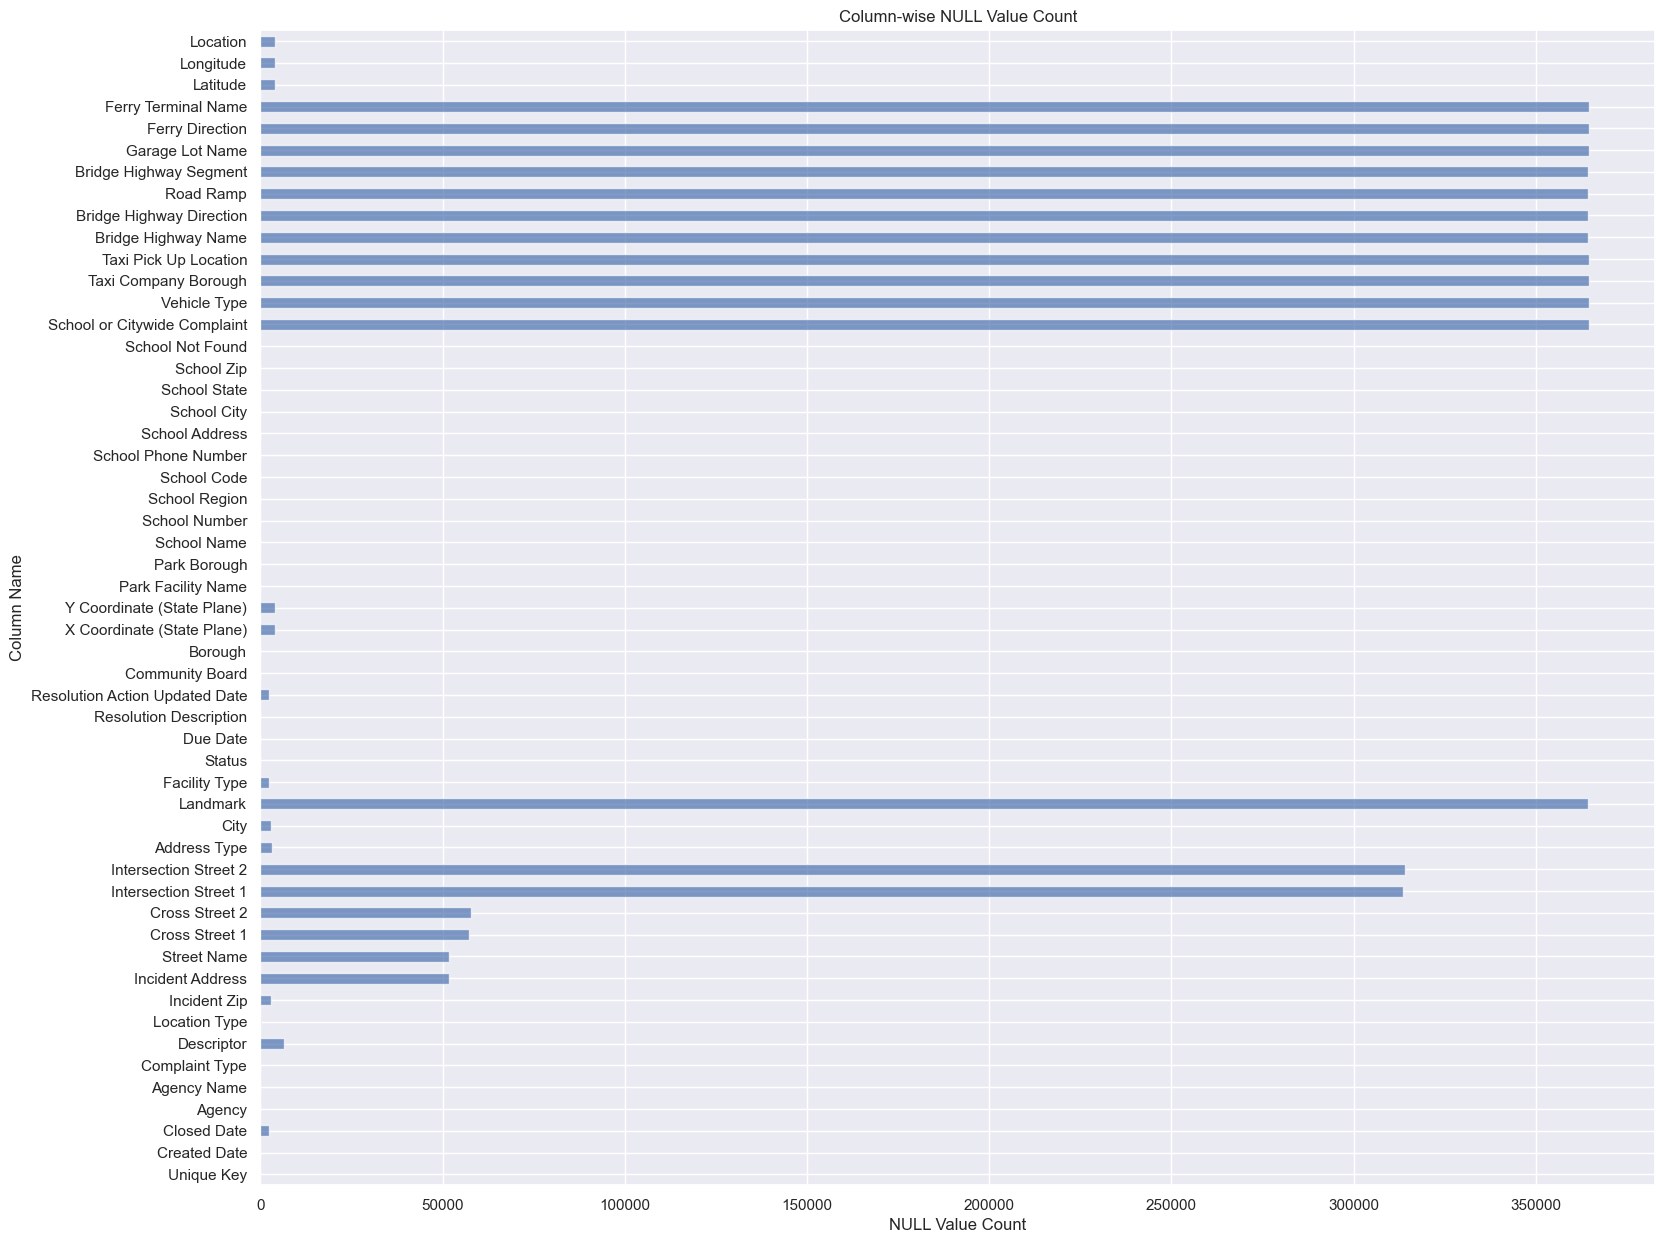

In [3]:
sns.set()
dataframe.isnull().sum().plot(kind='barh', alpha= 0.7, figsize= (18,15), title="Column-wise NULL Value Count")
plt.xlabel('NULL Value Count')
plt.ylabel('Column Name')
plt.show()

In [38]:
#Analyze the date column and remove the entries if it has incorrect timeline
df[['Closed_Date', 'Created_Date']].isnull().sum()

Closed_Date     2381
Created_Date       0
dtype: int64

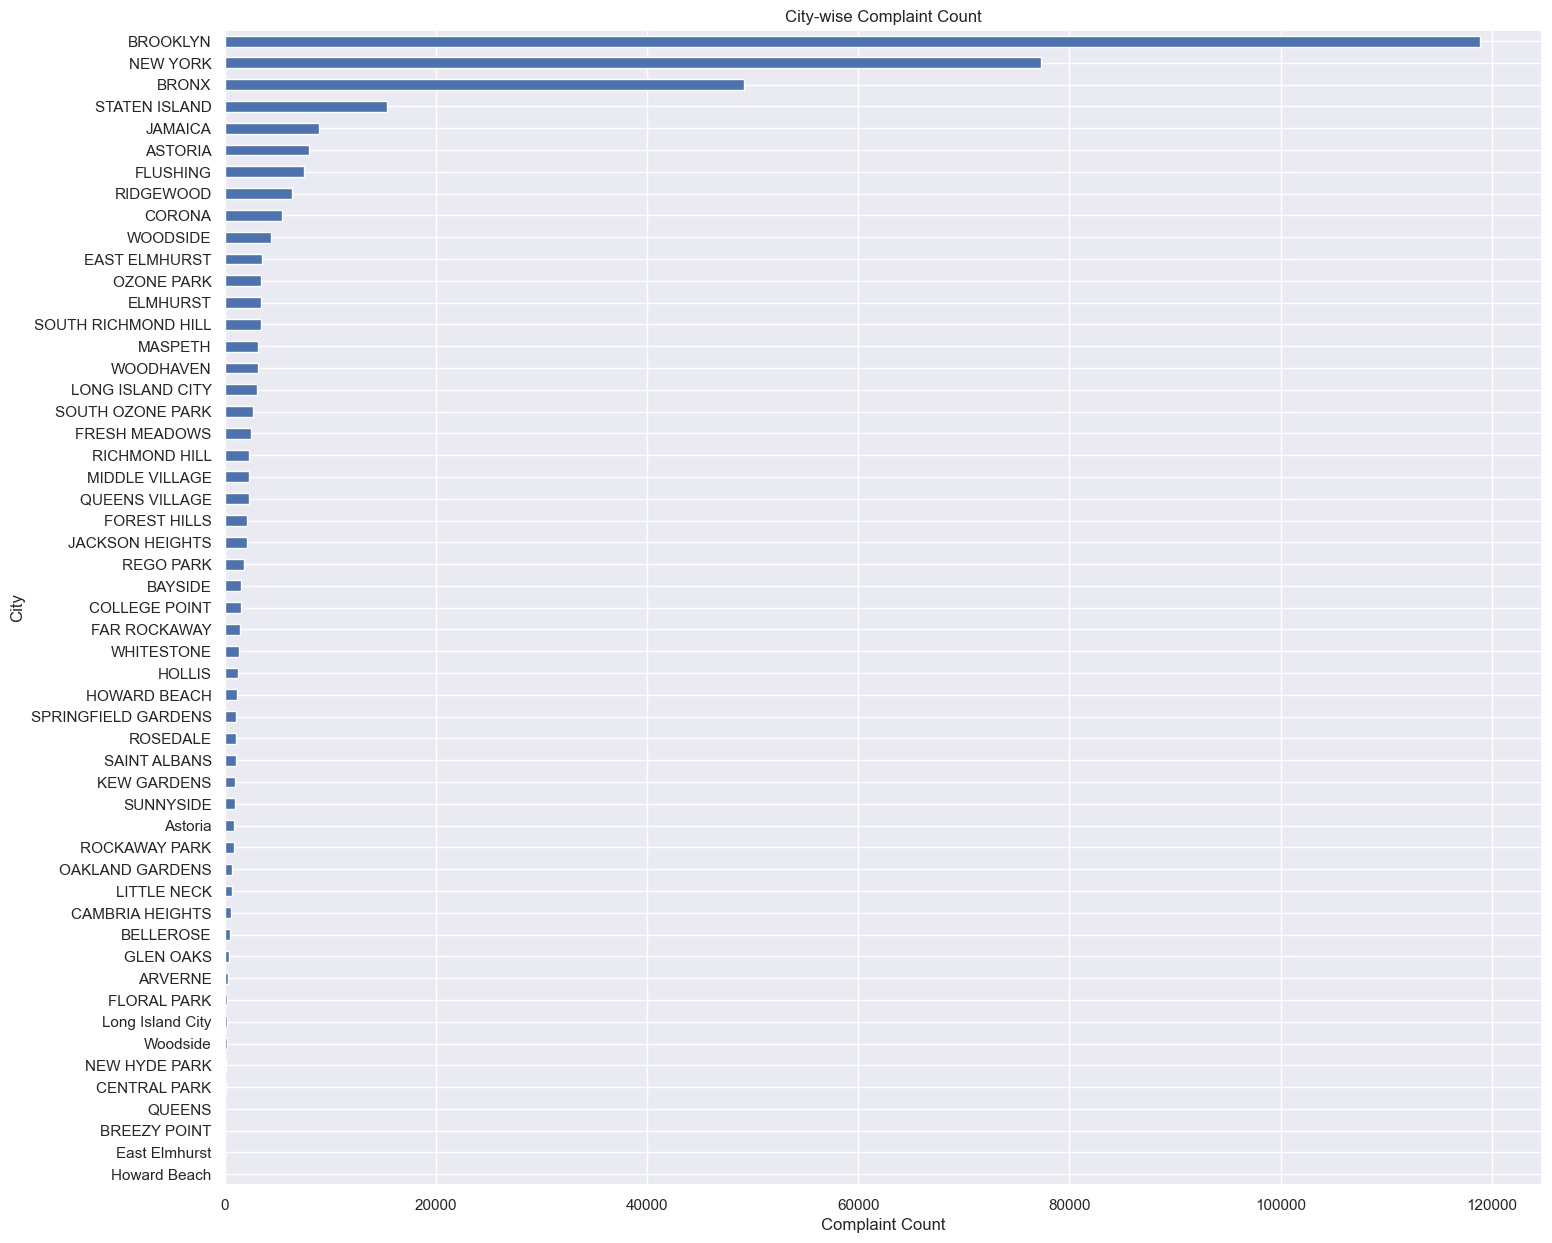

In [50]:
# Frequency Plot for complaints in each city
sns.set()
df['City'].value_counts().sort_values(ascending= True).plot(kind= 'barh', figsize=(17,15), title="City-wise Complaint Count")
plt.xlabel('Complaint Count')
plt.ylabel('City')
plt.show()

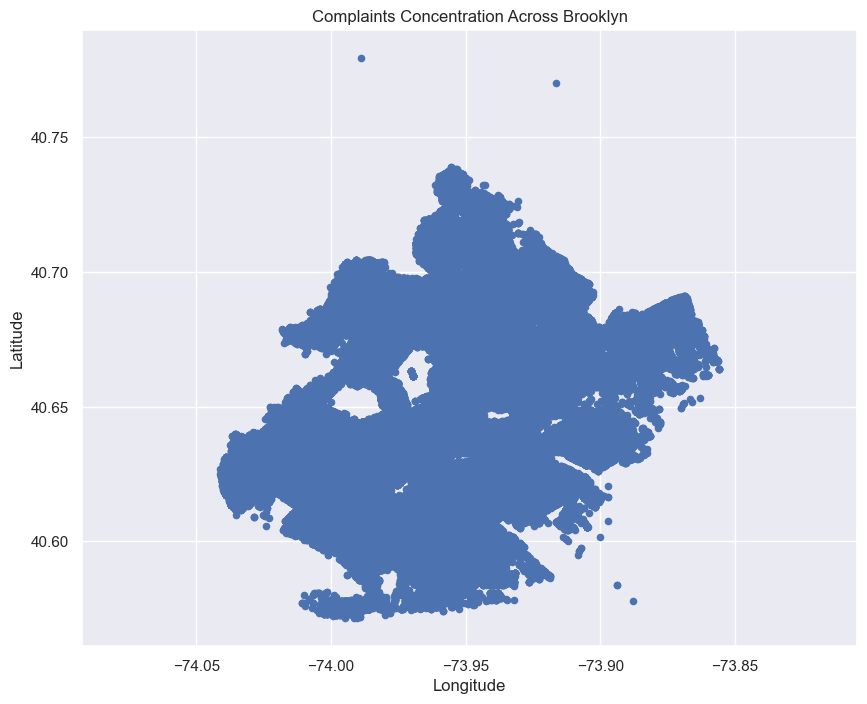

In [51]:
brooklyn_data = df[df['City']=='BROOKLYN']
brooklyn_data[['Longitude', 'Latitude']].plot(kind='scatter', 
                                         x='Longitude', 
                                         y='Latitude', 
                                         figsize=(10,8), 
                                         title = 'Complaints Concentration Across Brooklyn'
                                        ).axis('equal')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

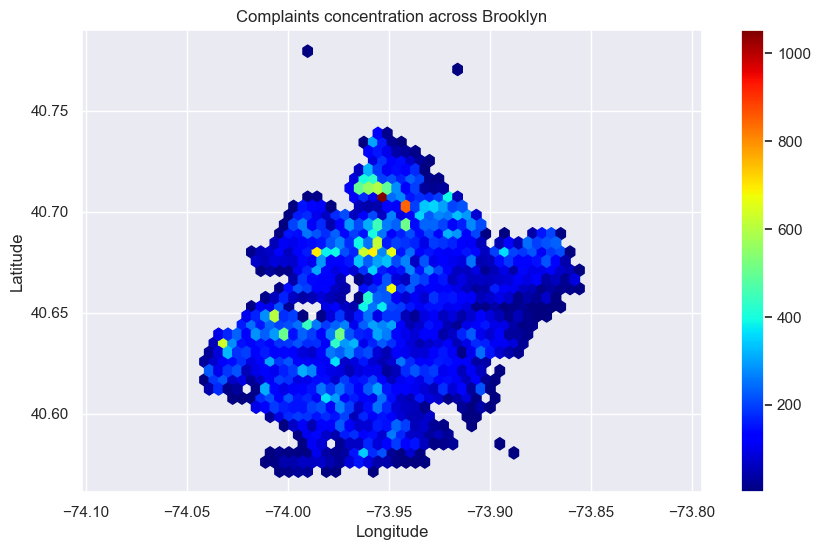

In [52]:
# Hexbin plot to visualize the complaint concentration 
brooklyn_data.plot(kind='hexbin', 
              x='Longitude', 
              y='Latitude', 
              gridsize=40,
              colormap = 'jet',
              mincnt=1,
              title = 'Complaints concentration across Brooklyn',
              figsize=(10,6)
             ).axis('equal')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

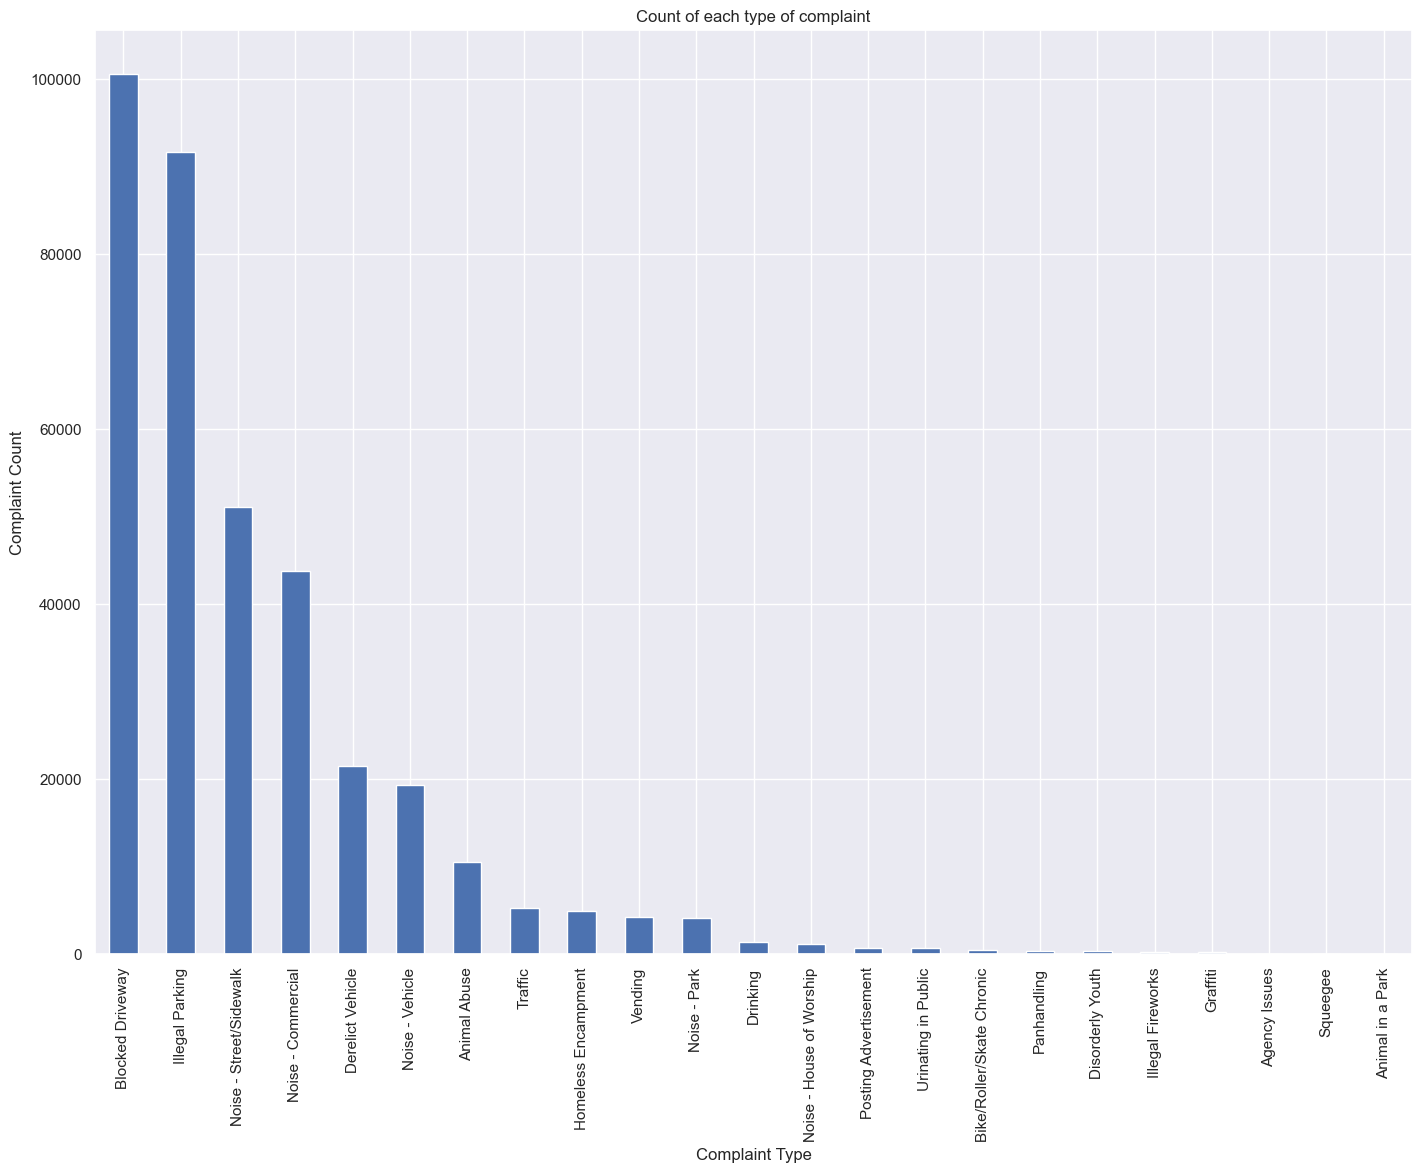

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', nan, 'RIDGEWOOD',
       'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND', 'OZONE PARK',
       'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT', 'QUEENS',
       'Astoria', 'Long Island City', 'Woodside', 'East Elmhurst',
       'Howard Beach'], dtype=object)

In [53]:
# Find the major type of complaints

# PLot a bar graph of types of complaints vs graph count
sns.set()
df['Complaint_Type'].value_counts().plot(kind= 'bar', figsize=(17,12), title="Count of each type of complaint")
plt.xlabel('Complaint Type')
plt.ylabel('Complaint Count')
plt.show()
df['City'].unique()

In [57]:
# frequency of various type of complaints in New York City
df.loc[df['City']== 'NEW YORK']['Complaint_Type'].value_counts()

Noise - Street/Sidewalk      22245
Noise - Commercial           18686
Illegal Parking              14549
Noise - Vehicle               6294
Homeless Encampment           3060
Blocked Driveway              2705
Vending                       2638
Animal Abuse                  1941
Traffic                       1769
Noise - Park                  1243
Derelict Vehicle               695
Drinking                       321
Urinating in Public            264
Bike/Roller/Skate Chronic      254
Noise - House of Worship       222
Panhandling                    206
Disorderly Youth                81
Posting Advertisement           49
Illegal Fireworks               38
Graffiti                        25
Squeegee                         4
Name: Complaint_Type, dtype: int64

In [60]:
# find the 10 types of complaints
df['Complaint_Type'].value_counts()[0:10]


Blocked Driveway           100624
Illegal Parking             91716
Noise - Street/Sidewalk     51139
Noise - Commercial          43751
Derelict Vehicle            21518
Noise - Vehicle             19301
Animal Abuse                10530
Traffic                      5196
Homeless Encampment          4879
Vending                      4185
Name: Complaint_Type, dtype: int64

In [64]:
#Display the types of complaints in each city in a separate dataset
df_new= pd.DataFrame()
for i in df['City'].unique():
    df_new[i]= df.loc[df['City']== i]['Complaint_Type'].value_counts()
df_new.head()

,NEW YORK,ASTORIA,BRONX,ELMHURST,BROOKLYN,KEW GARDENS,JACKSON HEIGHTS,MIDDLE VILLAGE,REGO PARK,SAINT ALBANS,...,FLORAL PARK,NEW HYDE PARK,CENTRAL PARK,BREEZY POINT,QUEENS,Astoria,Long Island City,Woodside,East Elmhurst,Howard Beach
Noise - Street/Sidewalk,22245,409.0,9144.0,228.0,13982.0,13.0,238.0,38.0,64.0,81.0,...,3.0,NaN,105.0,1.0,6.0,145.0,28.0,5.0,NaN,NaN
Noise - Commercial,18686,1653.0,2944.0,85.0,13855.0,203.0,619.0,13.0,82.0,36.0,...,3.0,4.0,NaN,4.0,6.0,310.0,19.0,2.0,NaN,NaN
Illegal Parking,14549,1340.0,9889.0,760.0,33532.0,276.0,240.0,1104.0,640.0,237.0,...,72.0,32.0,5.0,16.0,10.0,277.0,64.0,124.0,28.0,NaN
Noise - Vehicle,6294,236.0,3556.0,69.0,5965.0,23.0,75.0,45.0,60.0,50.0,...,2.0,2.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN
Homeless Encampment,3060,32.0,275.0,34.0,948.0,5.0,11.0,5.0,6.0,11.0,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Visualize the major types of complaints in each city

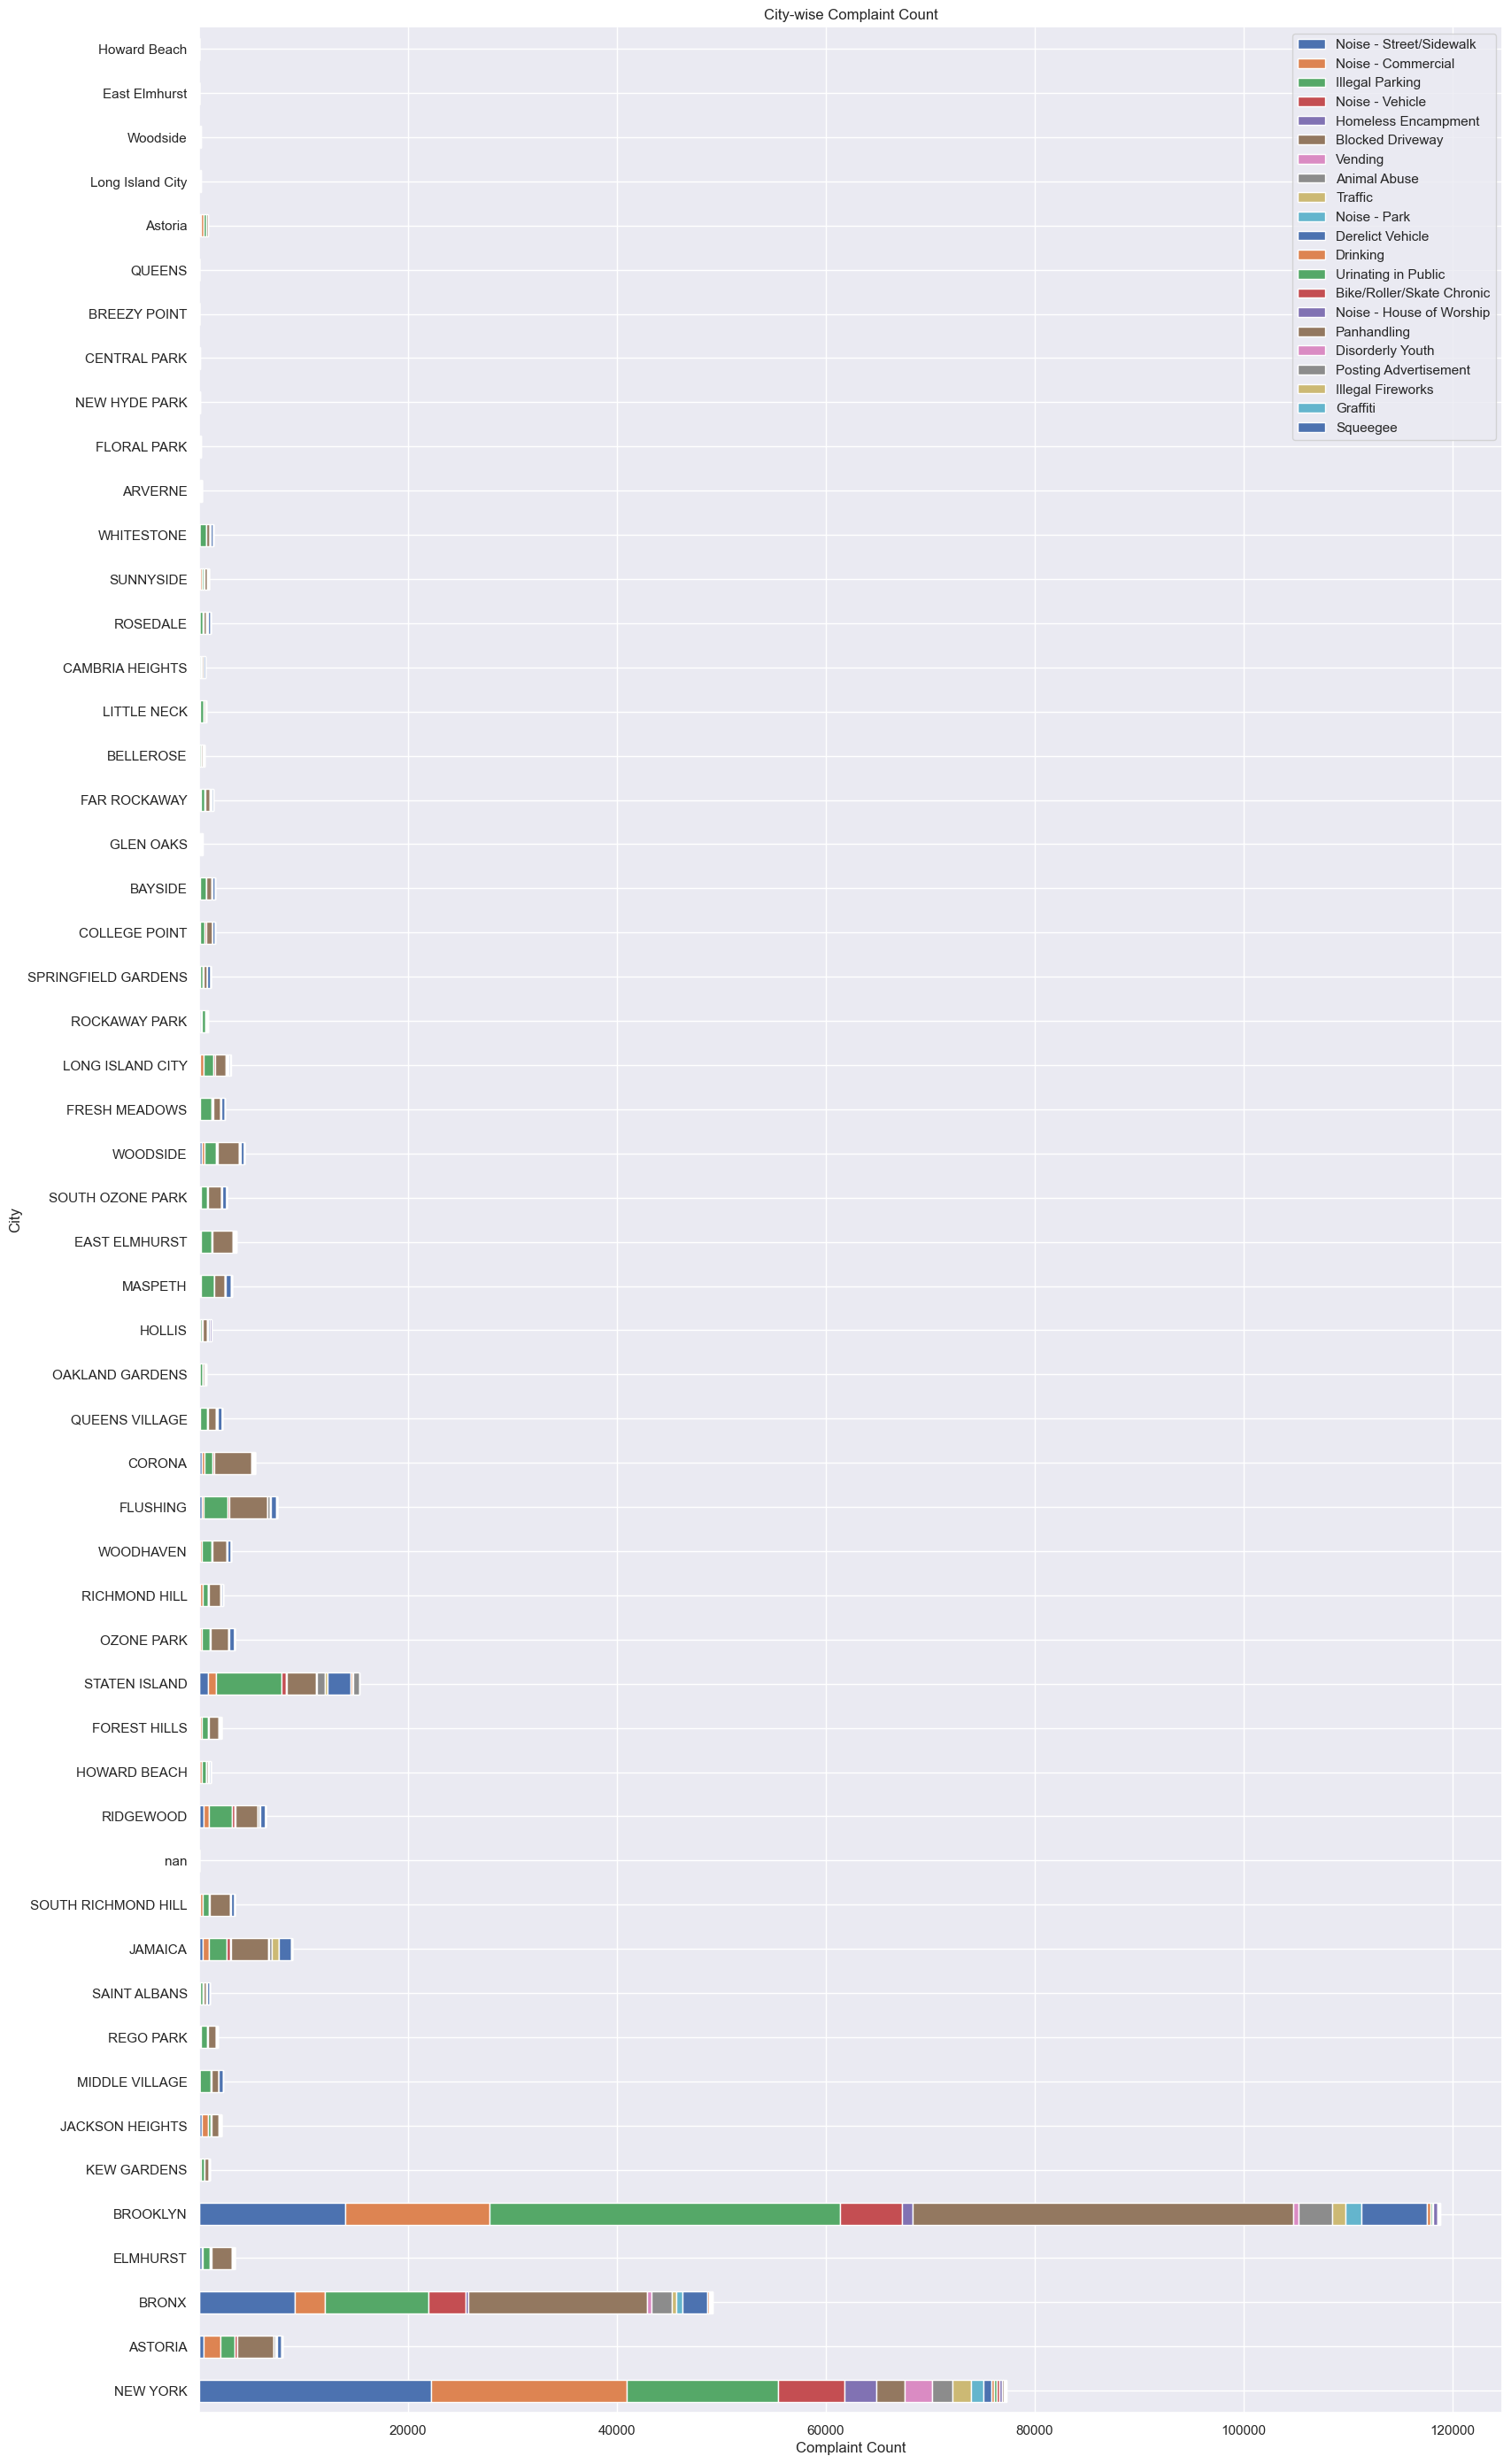

In [65]:
sns.set()
df_new.T.plot(kind= 'barh', stacked= True, figsize= (19, 35), title="City-wise Complaint Count")
plt.xlabel('Complaint Count')
plt.ylabel('City')
plt.show()

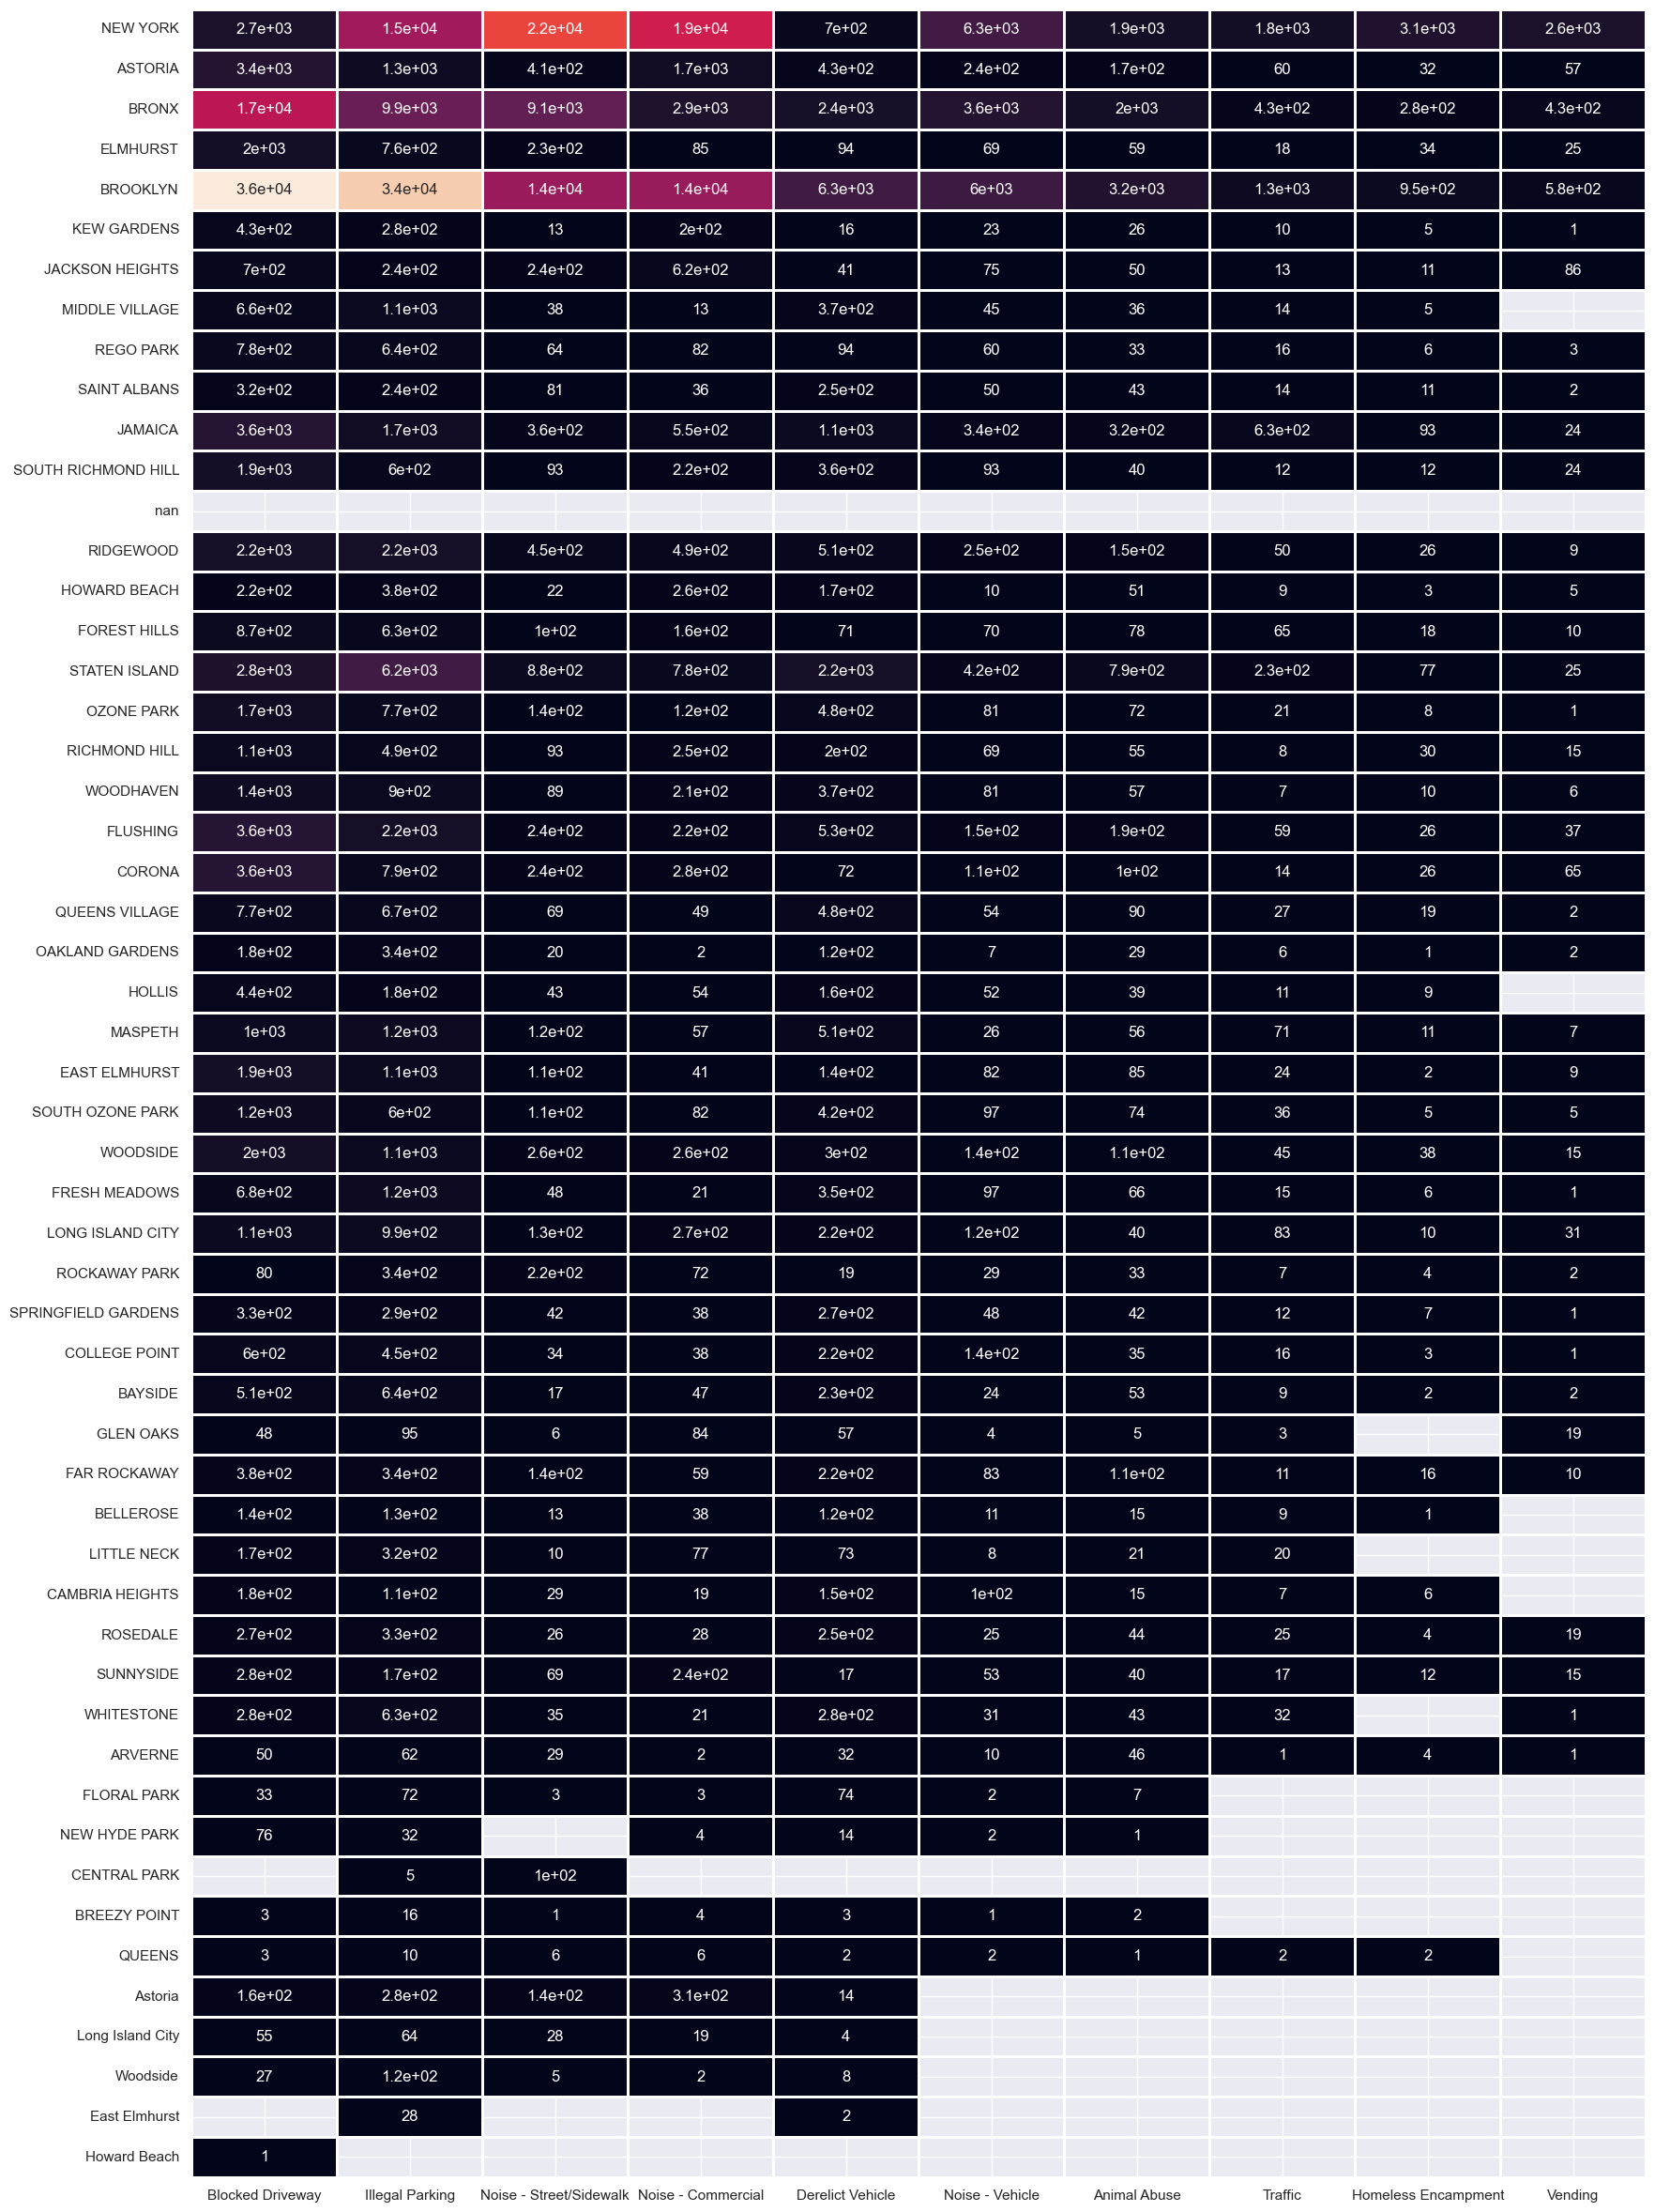

In [66]:
df_new_T= df_new.T
sns.set()
f, ax = plt.subplots(figsize=(20, 30))
sns.heatmap(df_new_T[top10_complaints], annot=True, cbar=False, linewidths=.8, ax=ax)
plt.show()

In [72]:
# identifying the significant variables by performing a statistical analysis using chi-square values
contingency_table = pd.crosstab(df['City'],df['Complaint_Type'], margins= True)


Complaint_Type,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,...,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending,All
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,46,0,0,50,32,2,1,1,4,0,...,2,29,10,1,0,0,1,1,1,259
ASTORIA,170,0,16,3436,426,5,43,4,32,4,...,64,409,236,2,3,0,60,10,57,7991
Astoria,0,0,0,159,14,0,0,0,0,0,...,0,145,0,0,0,0,0,0,0,905
BAYSIDE,53,0,0,514,231,2,1,3,2,0,...,4,17,24,0,0,0,9,0,2,1550
BELLEROSE,15,0,1,138,120,2,1,0,1,1,...,1,13,11,1,1,0,9,1,0,487


In [73]:
contingency_table.shape

(54, 23)

In [74]:
contingency_table.iloc[0:5][0:24].values

array([[  46,    0,    0,   50,   32,    2,    1,    1,    4,    0,   62,
           2,   14,    2,   29,   10,    1,    0,    0,    1,    1,    1,
         259],
       [ 170,    0,   16, 3436,  426,    5,   43,    4,   32,    4, 1340,
        1653,   21,   64,  409,  236,    2,    3,    0,   60,   10,   57,
        7991],
       [   0,    0,    0,  159,   14,    0,    0,    0,    0,    0,  277,
         310,    0,    0,  145,    0,    0,    0,    0,    0,    0,    0,
         905],
       [  53,    0,    0,  514,  231,    2,    1,    3,    2,    0,  638,
          47,    3,    4,   17,   24,    0,    0,    0,    9,    0,    2,
        1550],
       [  15,    0,    1,  138,  120,    2,    1,    0,    1,    1,  132,
          38,    1,    1,   13,   11,    1,    1,    0,    9,    1,    0,
         487]], dtype=int64)

In [75]:
f_obs= []
for i in range(0, contingency_table.shape[0]-1):
    f_obs.append(contingency_table.iloc[i][0:24].values)
f_obs= np.array(f_obs)
f_obs[0:5]


array([[  46,    0,    0,   50,   32,    2,    1,    1,    4,    0,   62,
           2,   14,    2,   29,   10,    1,    0,    0,    1,    1,    1,
         259],
       [ 170,    0,   16, 3436,  426,    5,   43,    4,   32,    4, 1340,
        1653,   21,   64,  409,  236,    2,    3,    0,   60,   10,   57,
        7991],
       [   0,    0,    0,  159,   14,    0,    0,    0,    0,    0,  277,
         310,    0,    0,  145,    0,    0,    0,    0,    0,    0,    0,
         905],
       [  53,    0,    0,  514,  231,    2,    1,    3,    2,    0,  638,
          47,    3,    4,   17,   24,    0,    0,    0,    9,    0,    2,
        1550],
       [  15,    0,    1,  138,  120,    2,    1,    0,    1,    1,  132,
          38,    1,    1,   13,   11,    1,    1,    0,    9,    1,    0,
         487]], dtype=int64)

In [76]:
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(141343.23155024176, 0.0, 1144)